<a href="https://colab.research.google.com/github/Karthik01018/Data-Cleaning-Preprocessing/blob/main/Clean_and_Prepare_raw_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

**Importing the file **

In [5]:
data = pd.read_csv('/content/Titanic-Dataset.csv')
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**Nulls **

In [6]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*Data Types*

In [7]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


*Handeling the Data with Mean*

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [10]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [11]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

*Encoding*

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Simplify Cabin by keeping just the deck letter (e.g., C85 -> C)
data['Cabin'] = data['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')

# Label Encoding for 'Sex' and 'Cabin'
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Cabin'] = le.fit_transform(data['Cabin'])

# One-hot encode 'Embarked'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Optional: Drop text-heavy columns that aren't useful as-is
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

<ipython-input-12-9bb35fc36e35>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-12-9bb35fc36e35>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [13]:
print(data.head())
print(data.dtypes)

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  \
0            1         0       3    1  22.0      1      0   7.2500      1   
1            2         1       1    0  38.0      1      0  71.2833      2   
2            3         1       3    0  26.0      0      0   7.9250      1   
3            4         1       1    0  35.0      1      0  53.1000      2   
4            5         0       3    1  35.0      0      0   8.0500      1   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  
PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
Embarked_Q        bool
Embarked_S        bool
dtype: object


*Normalize/standardize the numerical features*

In [14]:
 num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

*Previewing the Data*

In [17]:
print(data[num_cols].describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean      0.500000    0.383838    0.654321    0.647587    0.367921   
std       0.289162    0.486592    0.418036    0.477990    0.163383   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.250000    0.000000    0.500000    0.000000    0.271174   
50%       0.500000    0.000000    1.000000    1.000000    0.367921   
75%       0.750000    1.000000    1.000000    1.000000    0.434531   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

            SibSp       Parch        Fare       Cabin  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.065376    0.063599    0.062858    0.188392  
std      0.137843    0.134343    0.096995    0.130920  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.015440    0.142857  
50%      0.000000    0.000000    

*Visualize outliers using boxplots and remove them.*

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)


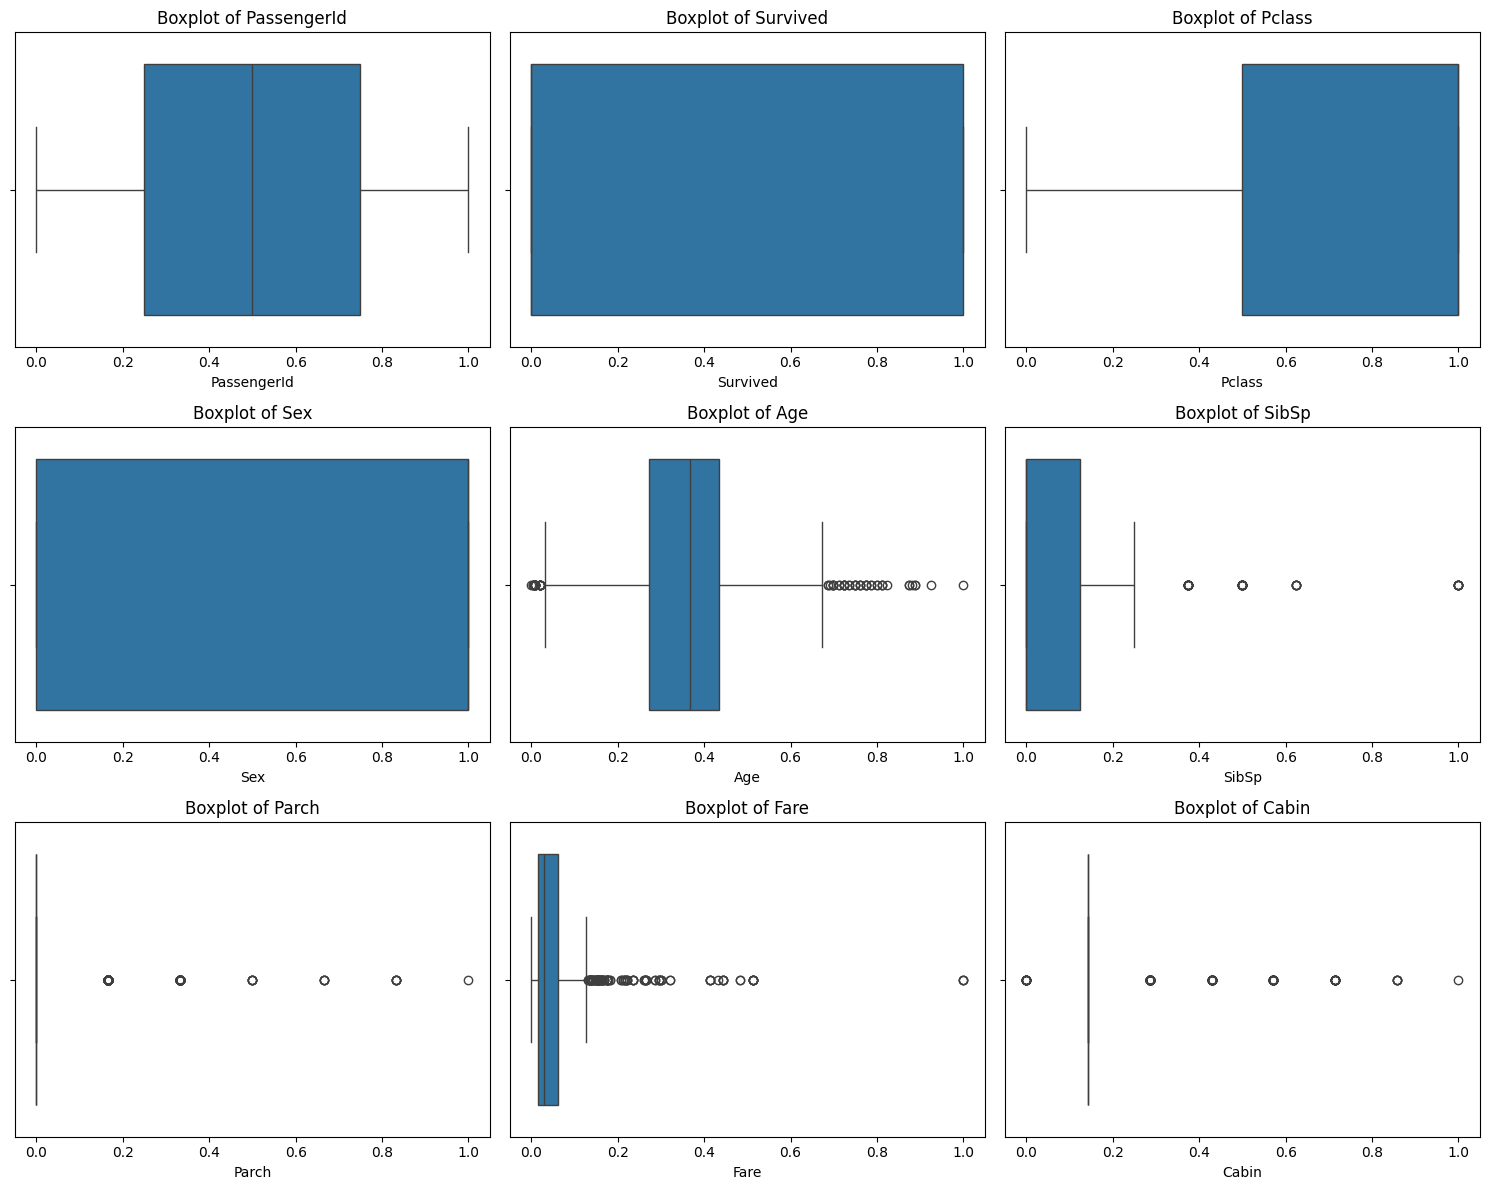

In [20]:
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()